<a href="https://colab.research.google.com/github/bodadaniel/Reinforcement_learning/blob/main/epsilon_greedy_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ϵ-greedy algorithm

##Import packages

In [2]:
import numpy as np
import randomgit
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)

##Parameters

In [3]:
n = 10 # n-armed bandit
eps = 0.1 # = P(exploration) = 1 - P(exploitation)

In [4]:
arms = np.random.rand(n)
arms # if P(X < x) then the response is favourable

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752])

##Functions

In [6]:
def reward(p):
  """Reward function with 10 trial"""
  return sum(np.random.rand(10) < p )

reward(0.1)

0

In [7]:
#For a start
av = np.array([np.random.randint(0,(n)), 0]).reshape(1,2) #av = action-value matrix

In [8]:
def LuckiestArm(av):
  """Gives back the luckiest arm over all previous iteration with 10 trials each"""
  summary = np.array([ [i_av[0], np.mean(av[(av[:, 0] == i_av[0]), 1])] for i_av in av ])
  return int(summary[np.argmax(summary, axis = 0)[1], 0])

LuckiestArm(av)

5

##Simulation

In [9]:
def Gaming(n_iter, eps):
    """Invoke"""
    av = np.array([np.random.randint(0,(n)), 0]).reshape(1,2)
    mean_n = []
    exploation = 0
    exploration = 0
    for i in range(n_iter):
      if np.random.rand(1) > eps: #exploation
        choice = LuckiestArm(av)
        i_av = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate([av, i_av], axis = 0)
        exploation += 1
      else: #exploration
        choice = np.argmax(arms == np.random.choice(arms))
        i_av = np.array([[choice, reward(arms[choice])]])
        av = np.concatenate([av, i_av], axis = 0)
        exploration += 1
      mean_n.append(np.mean(av[:,1]))
    return av, mean_n, [exploation, exploration]

av, m, e = Gaming(500, eps)

##Plotting

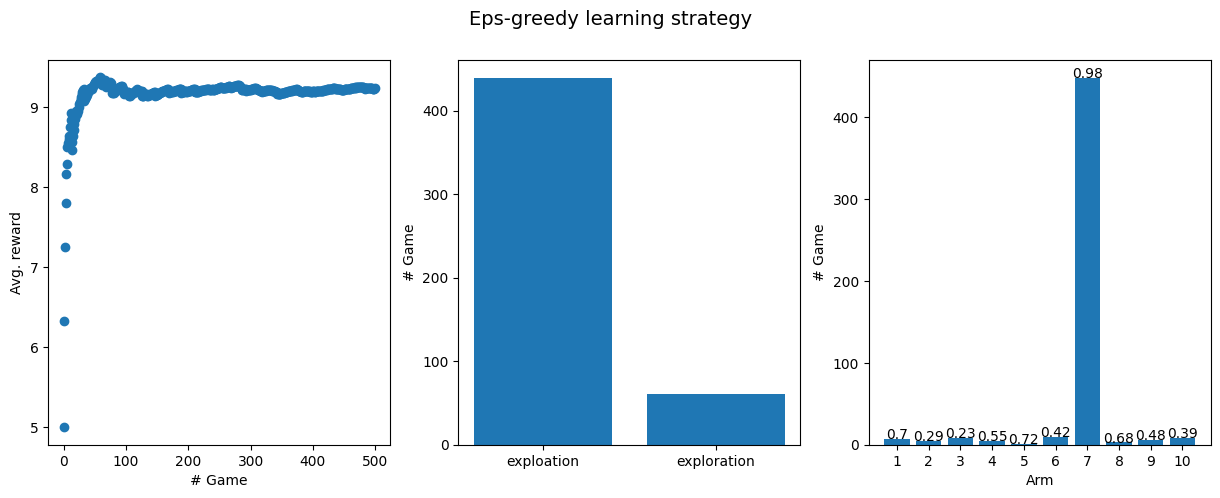

In [23]:
def plotting(m, e, av, arms):
  """1th: Avg. reward per game, 2nd: # action type, 3rd: num. pull on arm i"""
  unique, counts = np.unique(av[:, 0], return_counts=True)
  av_dict = dict(zip(unique + 1, counts))
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))
  fig.suptitle("Eps-greedy learning strategy", fontsize=14)
  ax[0].scatter(np.arange(0, len(m)), m)
  ax[0].set_xlabel('# Game')
  ax[0].set_ylabel('Avg. reward')
  ax[1].bar(['exploation', 'exploration'], e)
  ax[1].set_ylabel('# Game')
  ax[2].bar(av_dict.keys(), av_dict.values())
  ax[2].set_xticks(np.arange(1, len(arms) + 1))
  ax[2].set_ylabel('# Game')
  ax[2].set_xlabel('Arm')
  for x, y, s in zip(av_dict.keys(), av_dict.values(), np.round(arms, 2)):
          plt.text(x, y, s,  horizontalalignment='center', rotation = 'horizontal' );

plotting(m, e, av, arms)